# ICN Programming Course

<p align="center">
    <img width="500" alt="image" src="https://github.com/Lenakeiz/ICN_Programming_Course/blob/main/Images/cog_neuro_logo_blue_png_0.png?raw=true">
</p>

---

## Data visualisation and matplotlib

Data visualization should be the starting point of every analysis. It's often undervalued, with the belief that statistical analysis alone is sufficient.
However, the significance of visualizing data is exemplified by [Anscome's Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).
DCreated by Francis J. Anscombe in 1973, this consists of four datasets.
Each dataset yields identical summary statistics (mean, standard deviation, and correlation), suggesting they are similar.
Yet, when these datasets are graphically represented, their differences become apparent.
The key aspect of Anscombe's Quartet lies not in having four datasets with identical statistical properties, but in how these visually distinct datasets reveal those same properties.

Over the years more similar datasets have been created to show the importance of data visualization:
one of those is the Datasaurus dataset which urges people to "never trust summary statistics alone; always visualize your data", since, while the data exhibits normal seeming statistics, plotting the data reveals a picture of a dinosaur 🦖.
Inspired by Anscombe's Quartet, the Datasaurus you can download found in the original publication the [_datasaurus dozen_](https://dl.acm.org/doi/10.1145/3025453.3025912 
), _i.e._ 13 datasets (the Datasaurus + $12$ others) having the same summary statistics up to two decimal places.

Hence, the golden rule is the following one.
> Always find a nice way to visualise your data before going into applying the statistics.


<p align="center">
    <img width="1000" src="https://blog.revolutionanalytics.com/downloads/DataSaurus%20Dozen.gif">
</p>

### Pandas plotting

Another great thing about pandas is that it integrates with [Matplotlib](https://matplotlib.org/) asd well as [Seaborn](https://seaborn.pydata.org/), two very important  so you get the ability to plot directly off DataFrames and Series.

To get started we need to import those libraries (make sure to have them installed first).

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# set plot size
plt.rcParams['figure.figsize'] = (20, 13)
# this is a magic command for Jupyter Notebooks or IPython environments. It sets up the Matplotlib figures to be displayed inline, which means that the plots will be shown directly under the code cell that produced them.
%matplotlib inline
# set the resolution of the plot - retina means higher pixel density
%config InlineBackend.figure_format = "retina"

---
## Graphical analysis

The aim is to start our data analysis using Python data visualization tools.

### Matplotlib and Seaborn

[Matplotlib](https://matplotlib.org/) is a highly customisable library, and that could come with drawbacks.
[Seaborn](https://seaborn.pydata.org/) standardises some graphical aspects and easily integrates with Pandas.

When importing seaborn as sns you can also set default options to make the plots more readable.
It is very simnple to do that by using `sns.set()`.
Indeed, once that Seaborn has been imported, we can use the set function to force its default graphical settings.

```python
import seaborn as sns
sns.set()
```

Tricky question for you:
> Why we import Seaborn as `sns`?

<details>
    <summary><b>HINT</b></summary> 
    <p align="center">
      <a href= "https://stackoverflow.com/questions/41499857/seaborn-why-import-as-sns"><img src="https://www.thesun.co.uk/wp-content/uploads/2019/06/NINTCHDBPICT000002475114.jpg" width="350" title="Sam Norman Seaborn"></a>
    </p>
    Click on the image for a little bit more detailed answer.
</details>

#### Import data

Let's start by import movie dataset and plot the relationship between `ratings` and `revenue`. 
All we need to do is call `plot()` on df with some info about how to construct the plot.

In [27]:
data_url = 'https://raw.githubusercontent.com/LearnDataSci/articles/master/Python%20Pandas%20Tutorial%20A%20Complete%20Introduction%20for%20Beginners/IMDB-Movie-Data.csv'

df = pd.read_csv(data_url)
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


To plot our output is very easy now that we have imported Matplotlib. In fact we will now have an extension method for the class dataframe called `plot`. The function works as a a wrapper around Matplotlib's plotting functions as it is able to print different `kind` of plots. You can use it on Dataframes or a Series (an individual column of a dataframe).

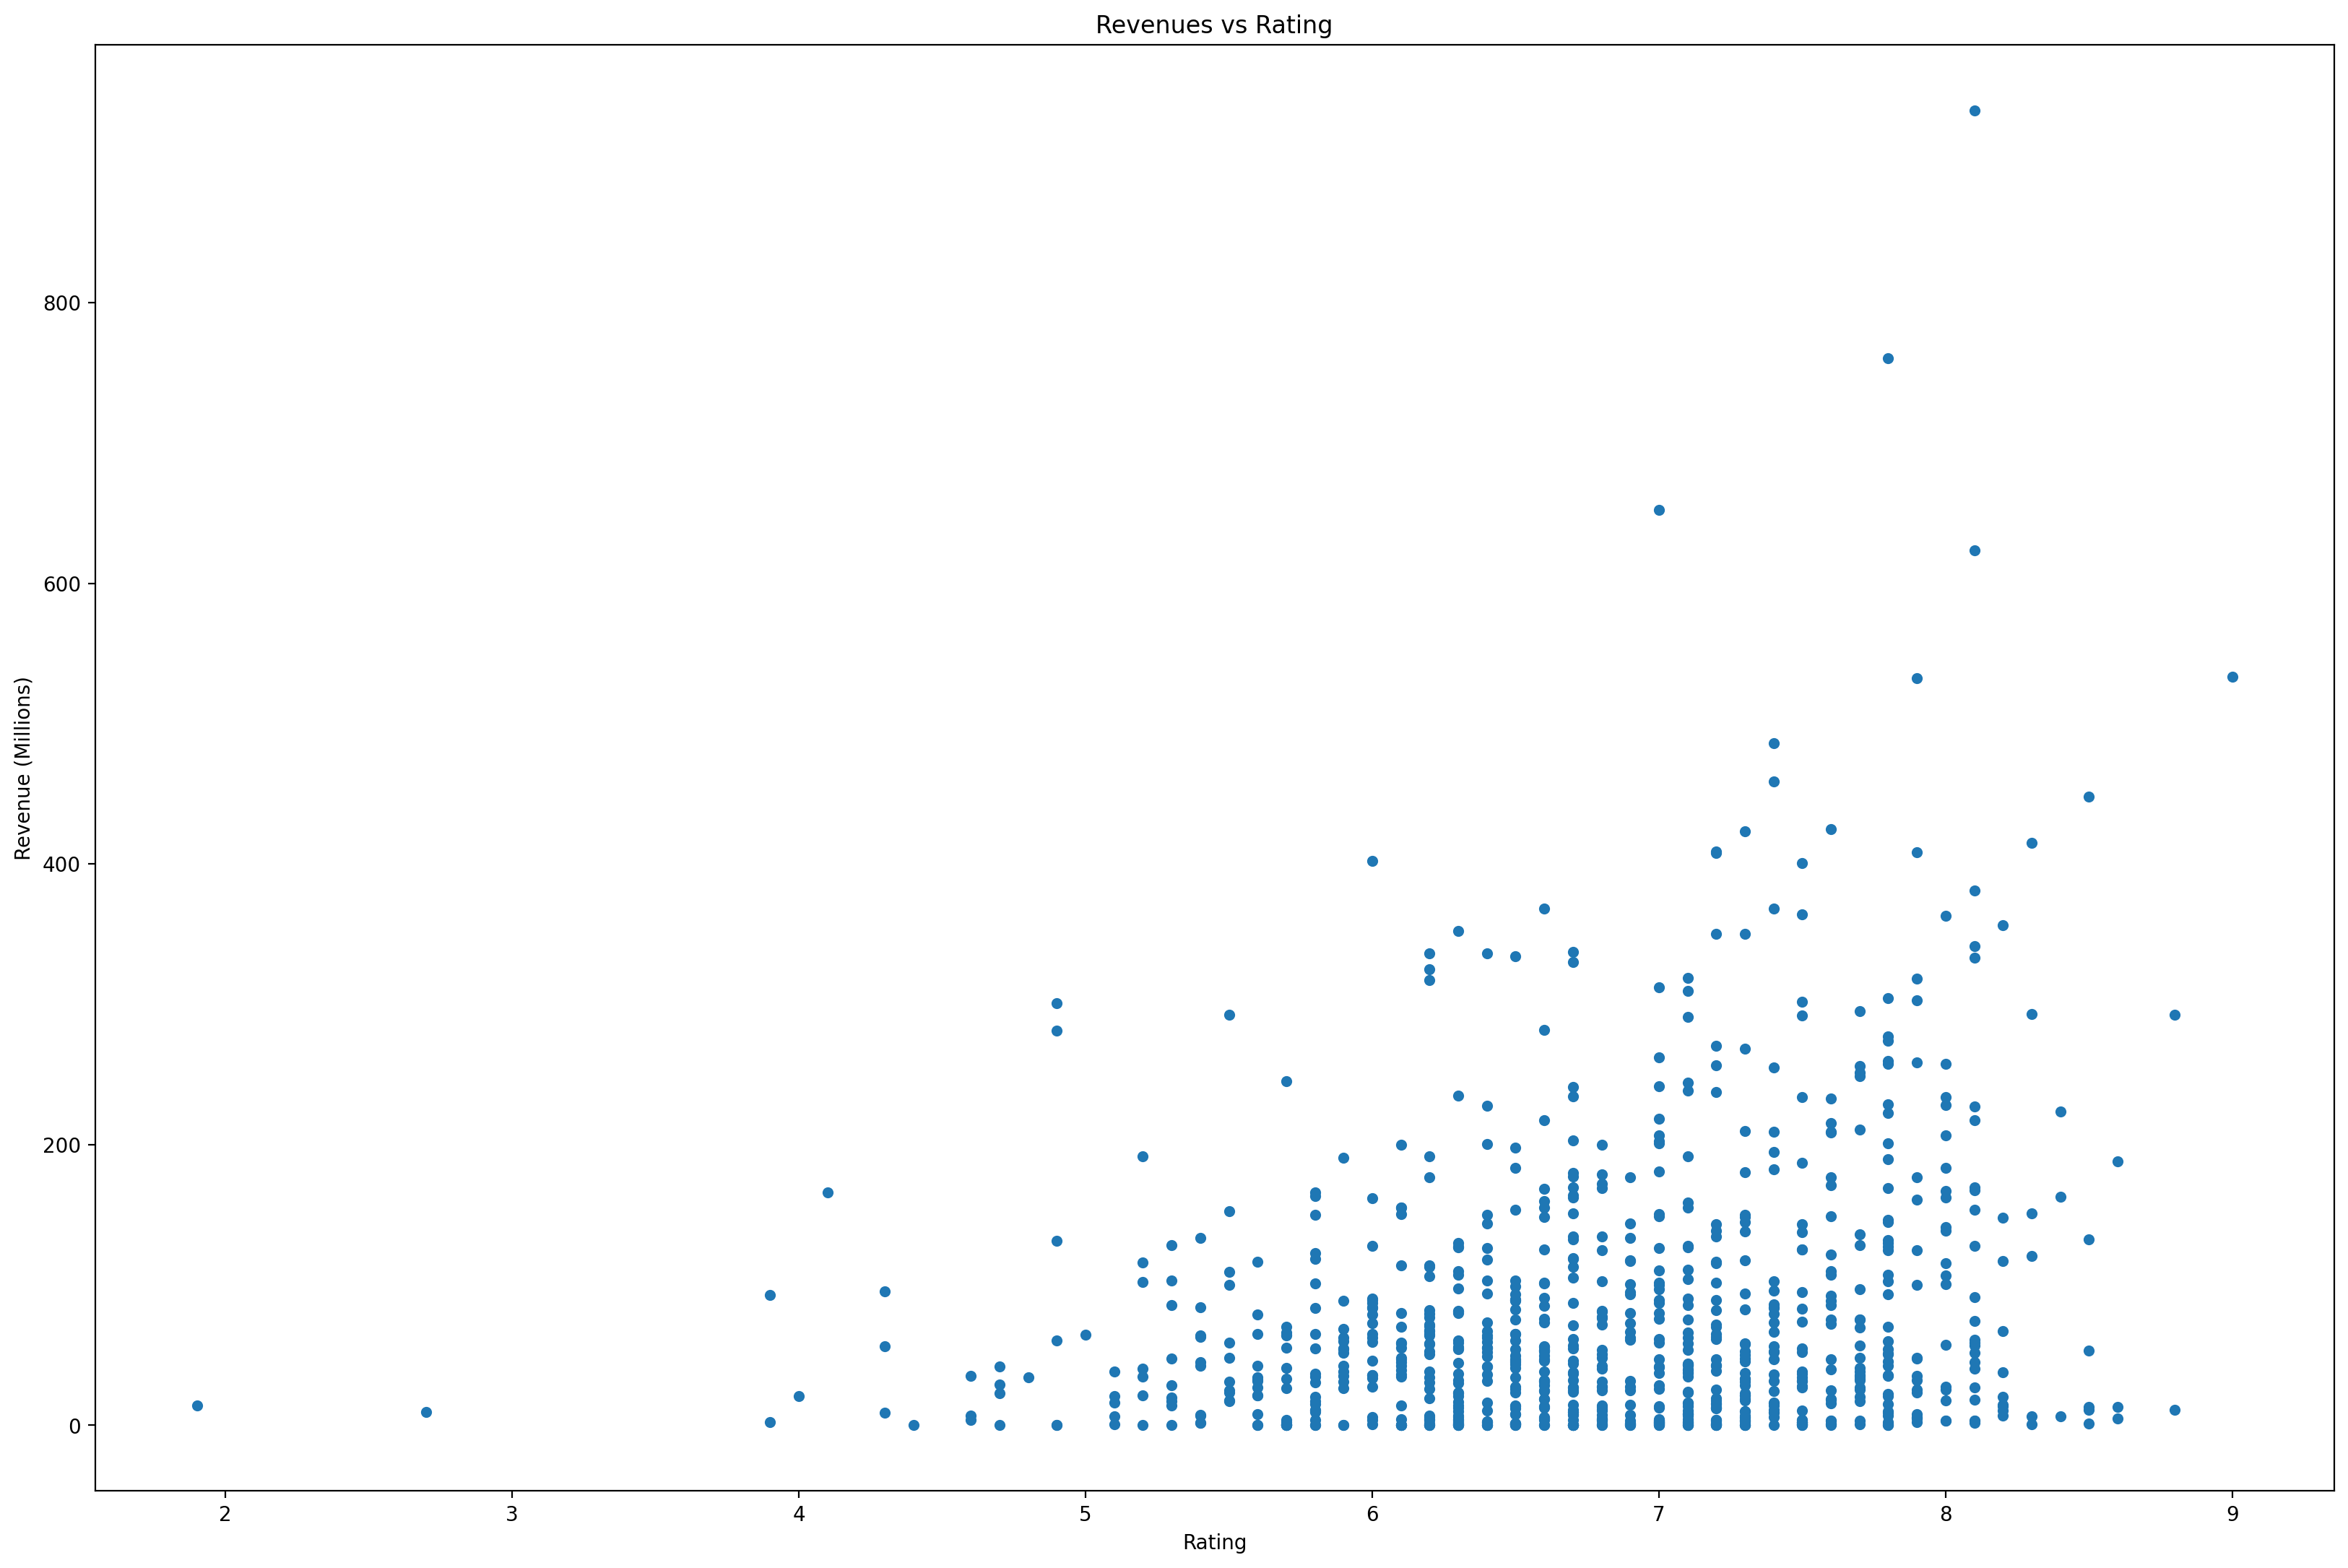

In [4]:
df.plot(kind='scatter', x='Rating', y='Revenue (Millions)', 
    title = "Revenues vs Rating", figsize=(20,13));

Pandas' `plot` function has many optional arguments.

Some of these arguments are linked to Matplotlib properties and not directly available within the function documentation (😠). 
A complete list of such properties can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html).

While some of these properties might be never of use, some of them are quite useful like `marker` and `color` ones.

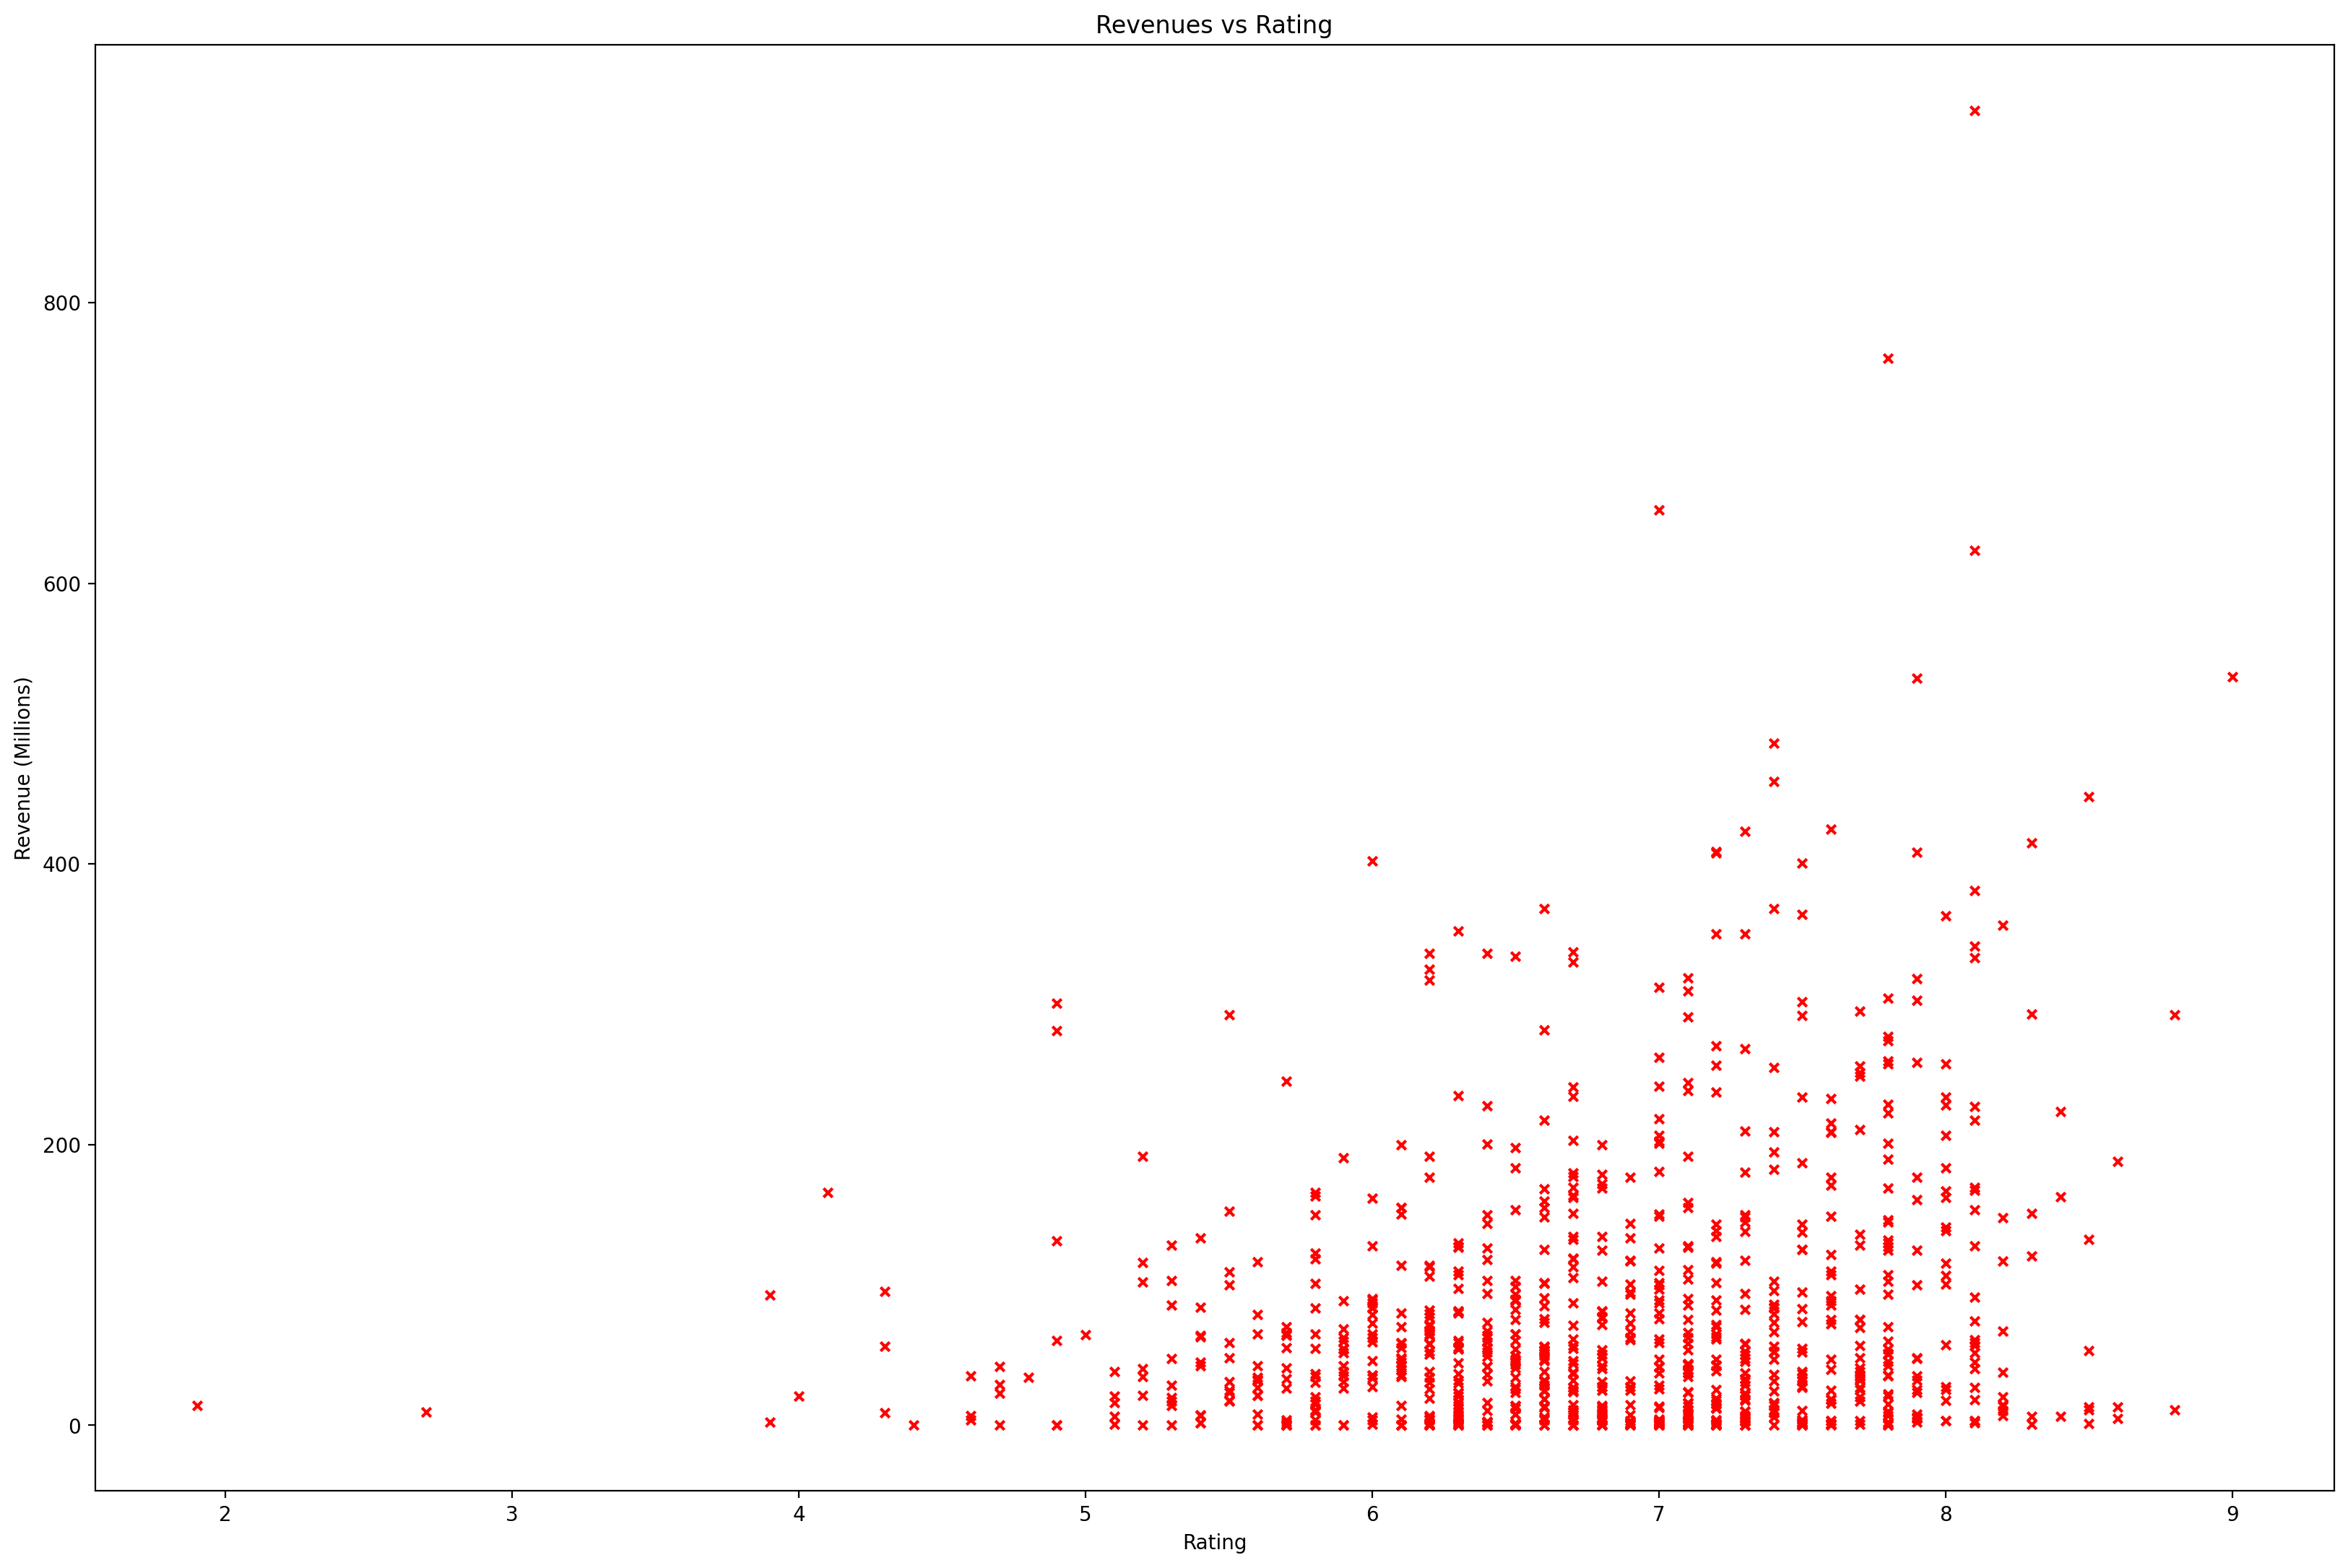

In [5]:
df.plot(kind='scatter', 
    x='Rating', 
    y='Revenue (Millions)', 
    title = "Revenues vs Rating",
    marker='x',
    color='r',
    figsize=(20,13));

Since `plot` works on the series or dataframe objects, we can still apply of the pandas functions that return such objects. In particular we can run `queries` and then plot the filtered quantities.

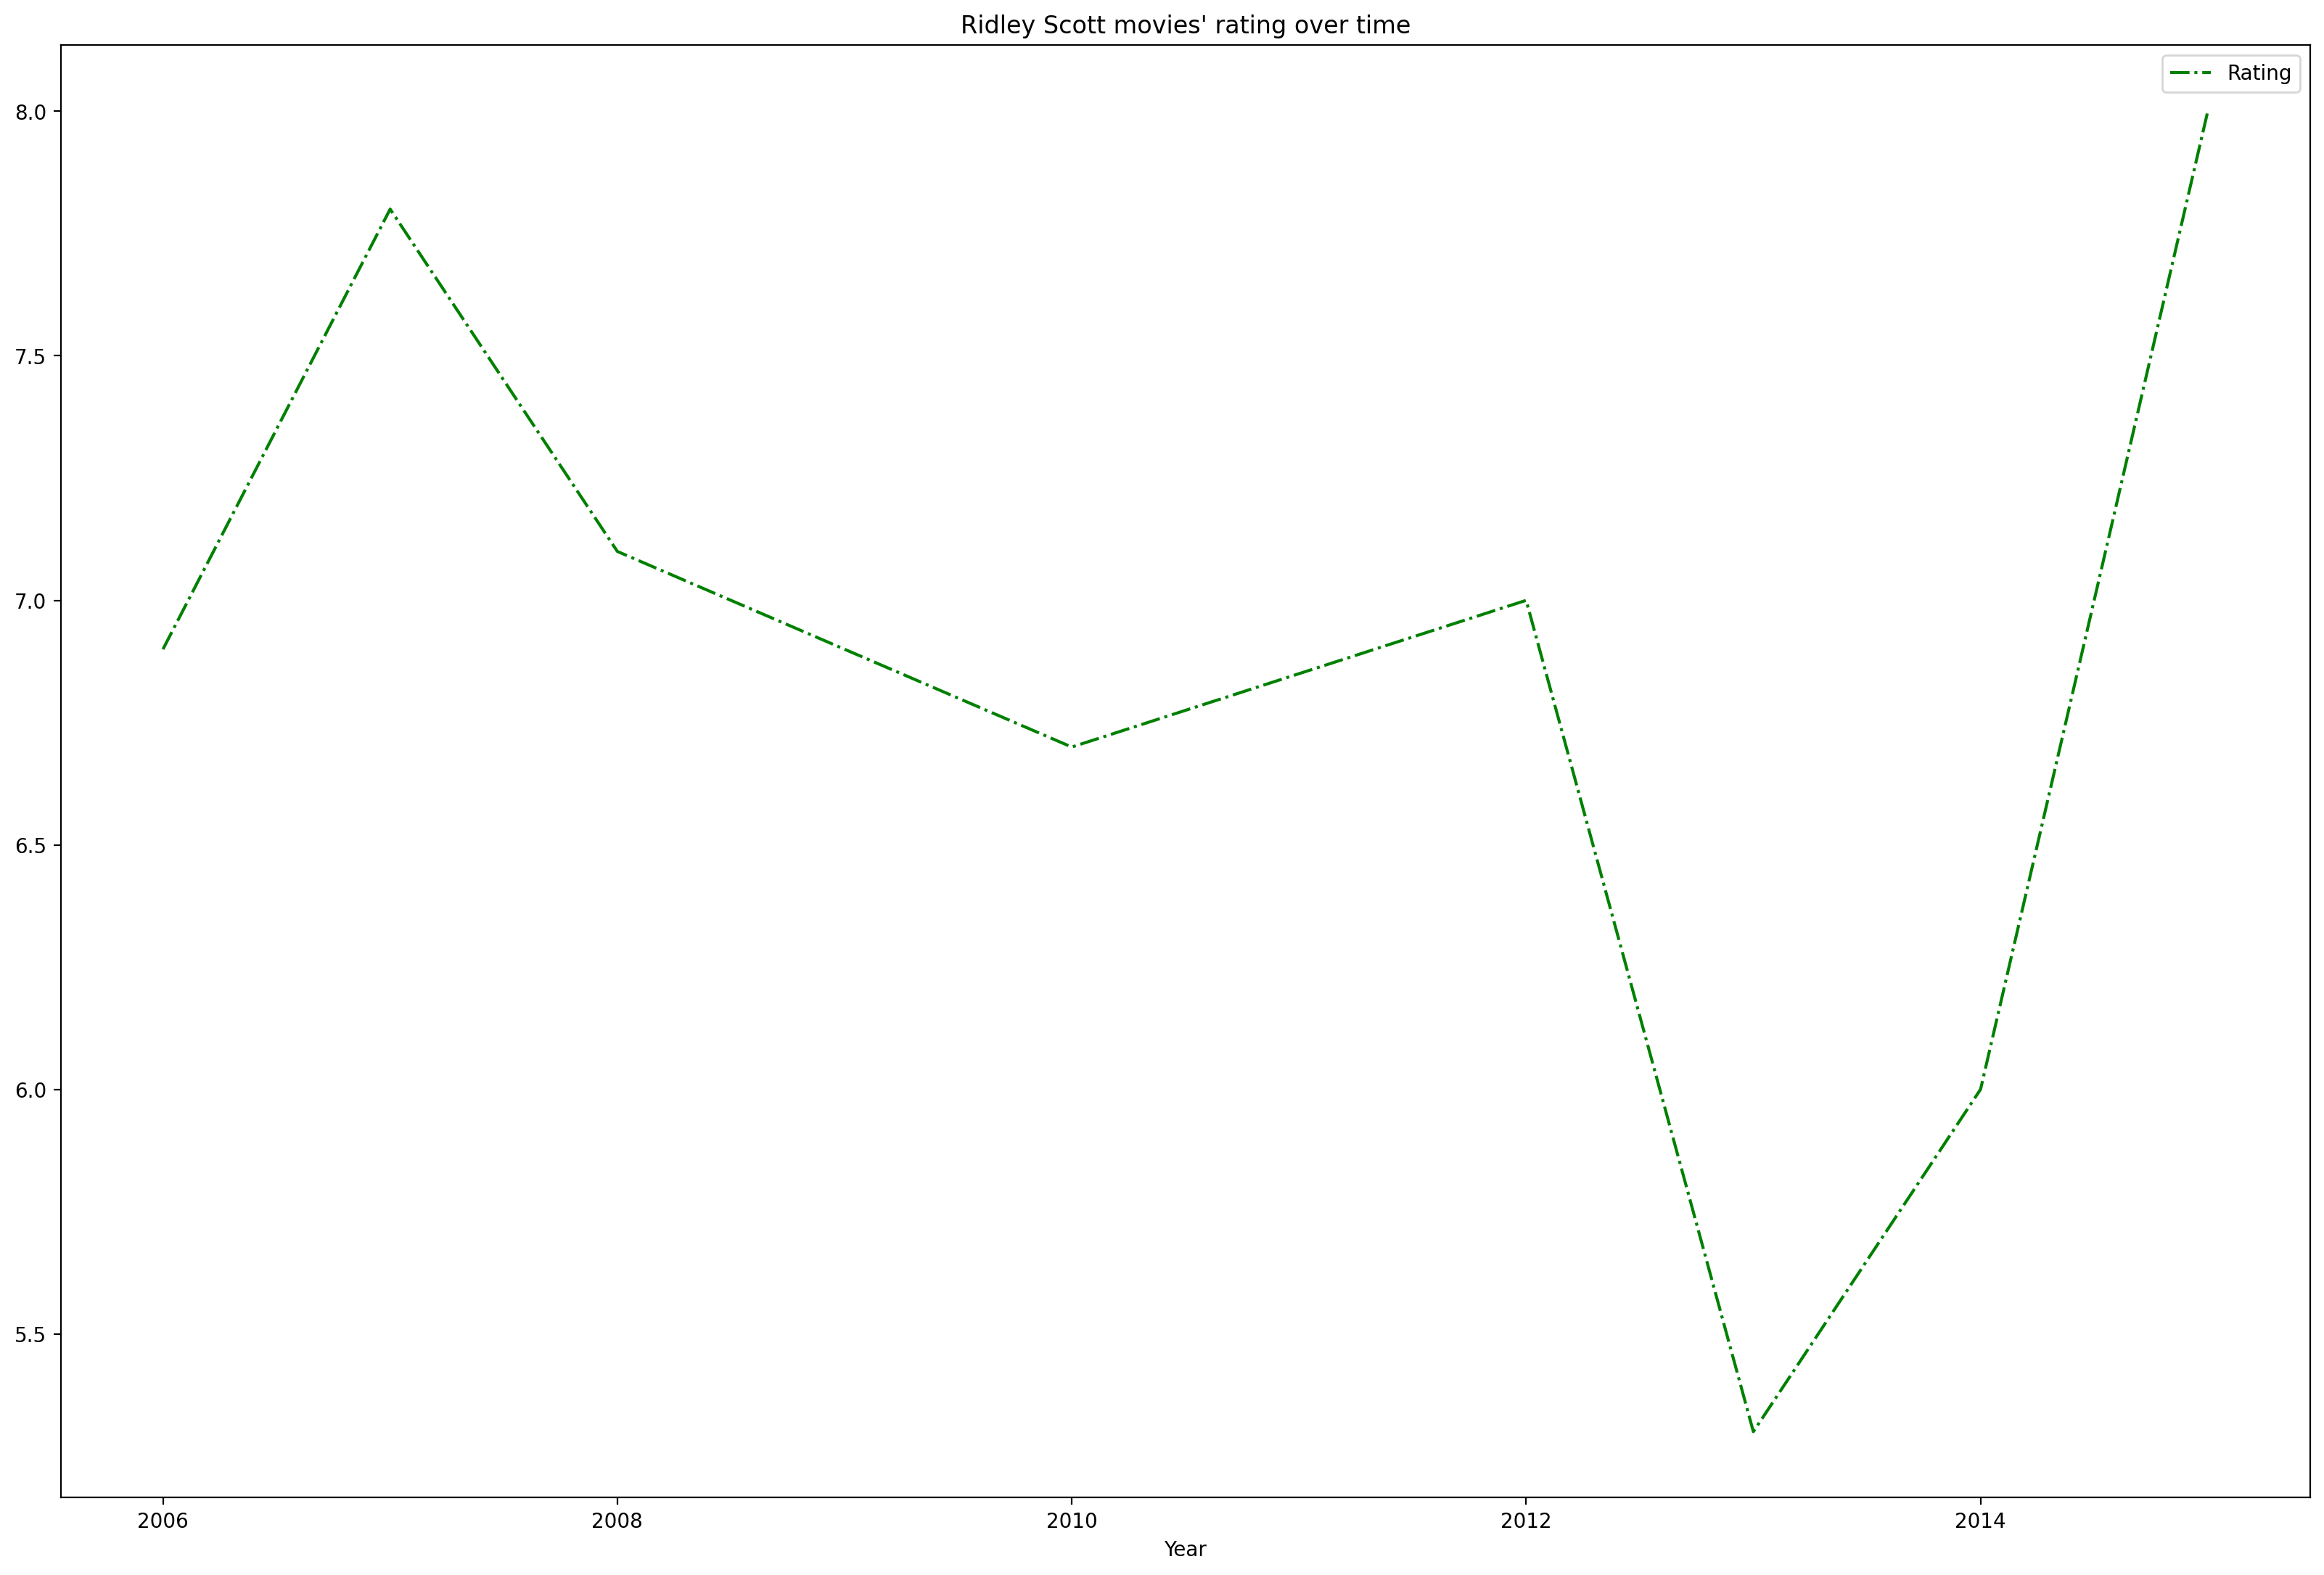

In [6]:
df.query("Director == 'Ridley Scott'").sort_values(by="Year").plot(x="Year",
                                            y="Rating",
                                            linestyle="-.",
                                            title="Ridley Scott movies' rating over time",
                                            color='g',
                                            figsize=(20,13));

This is a nice plot, but sometimes inputs into our datasets might be input manually from the source and so it could be the case that when we search for a string that could be case sensitive.
Luckily we can solve the problem by using string functions and doing alternative ways for querying the dataframe.

As you will notice the output is the same.

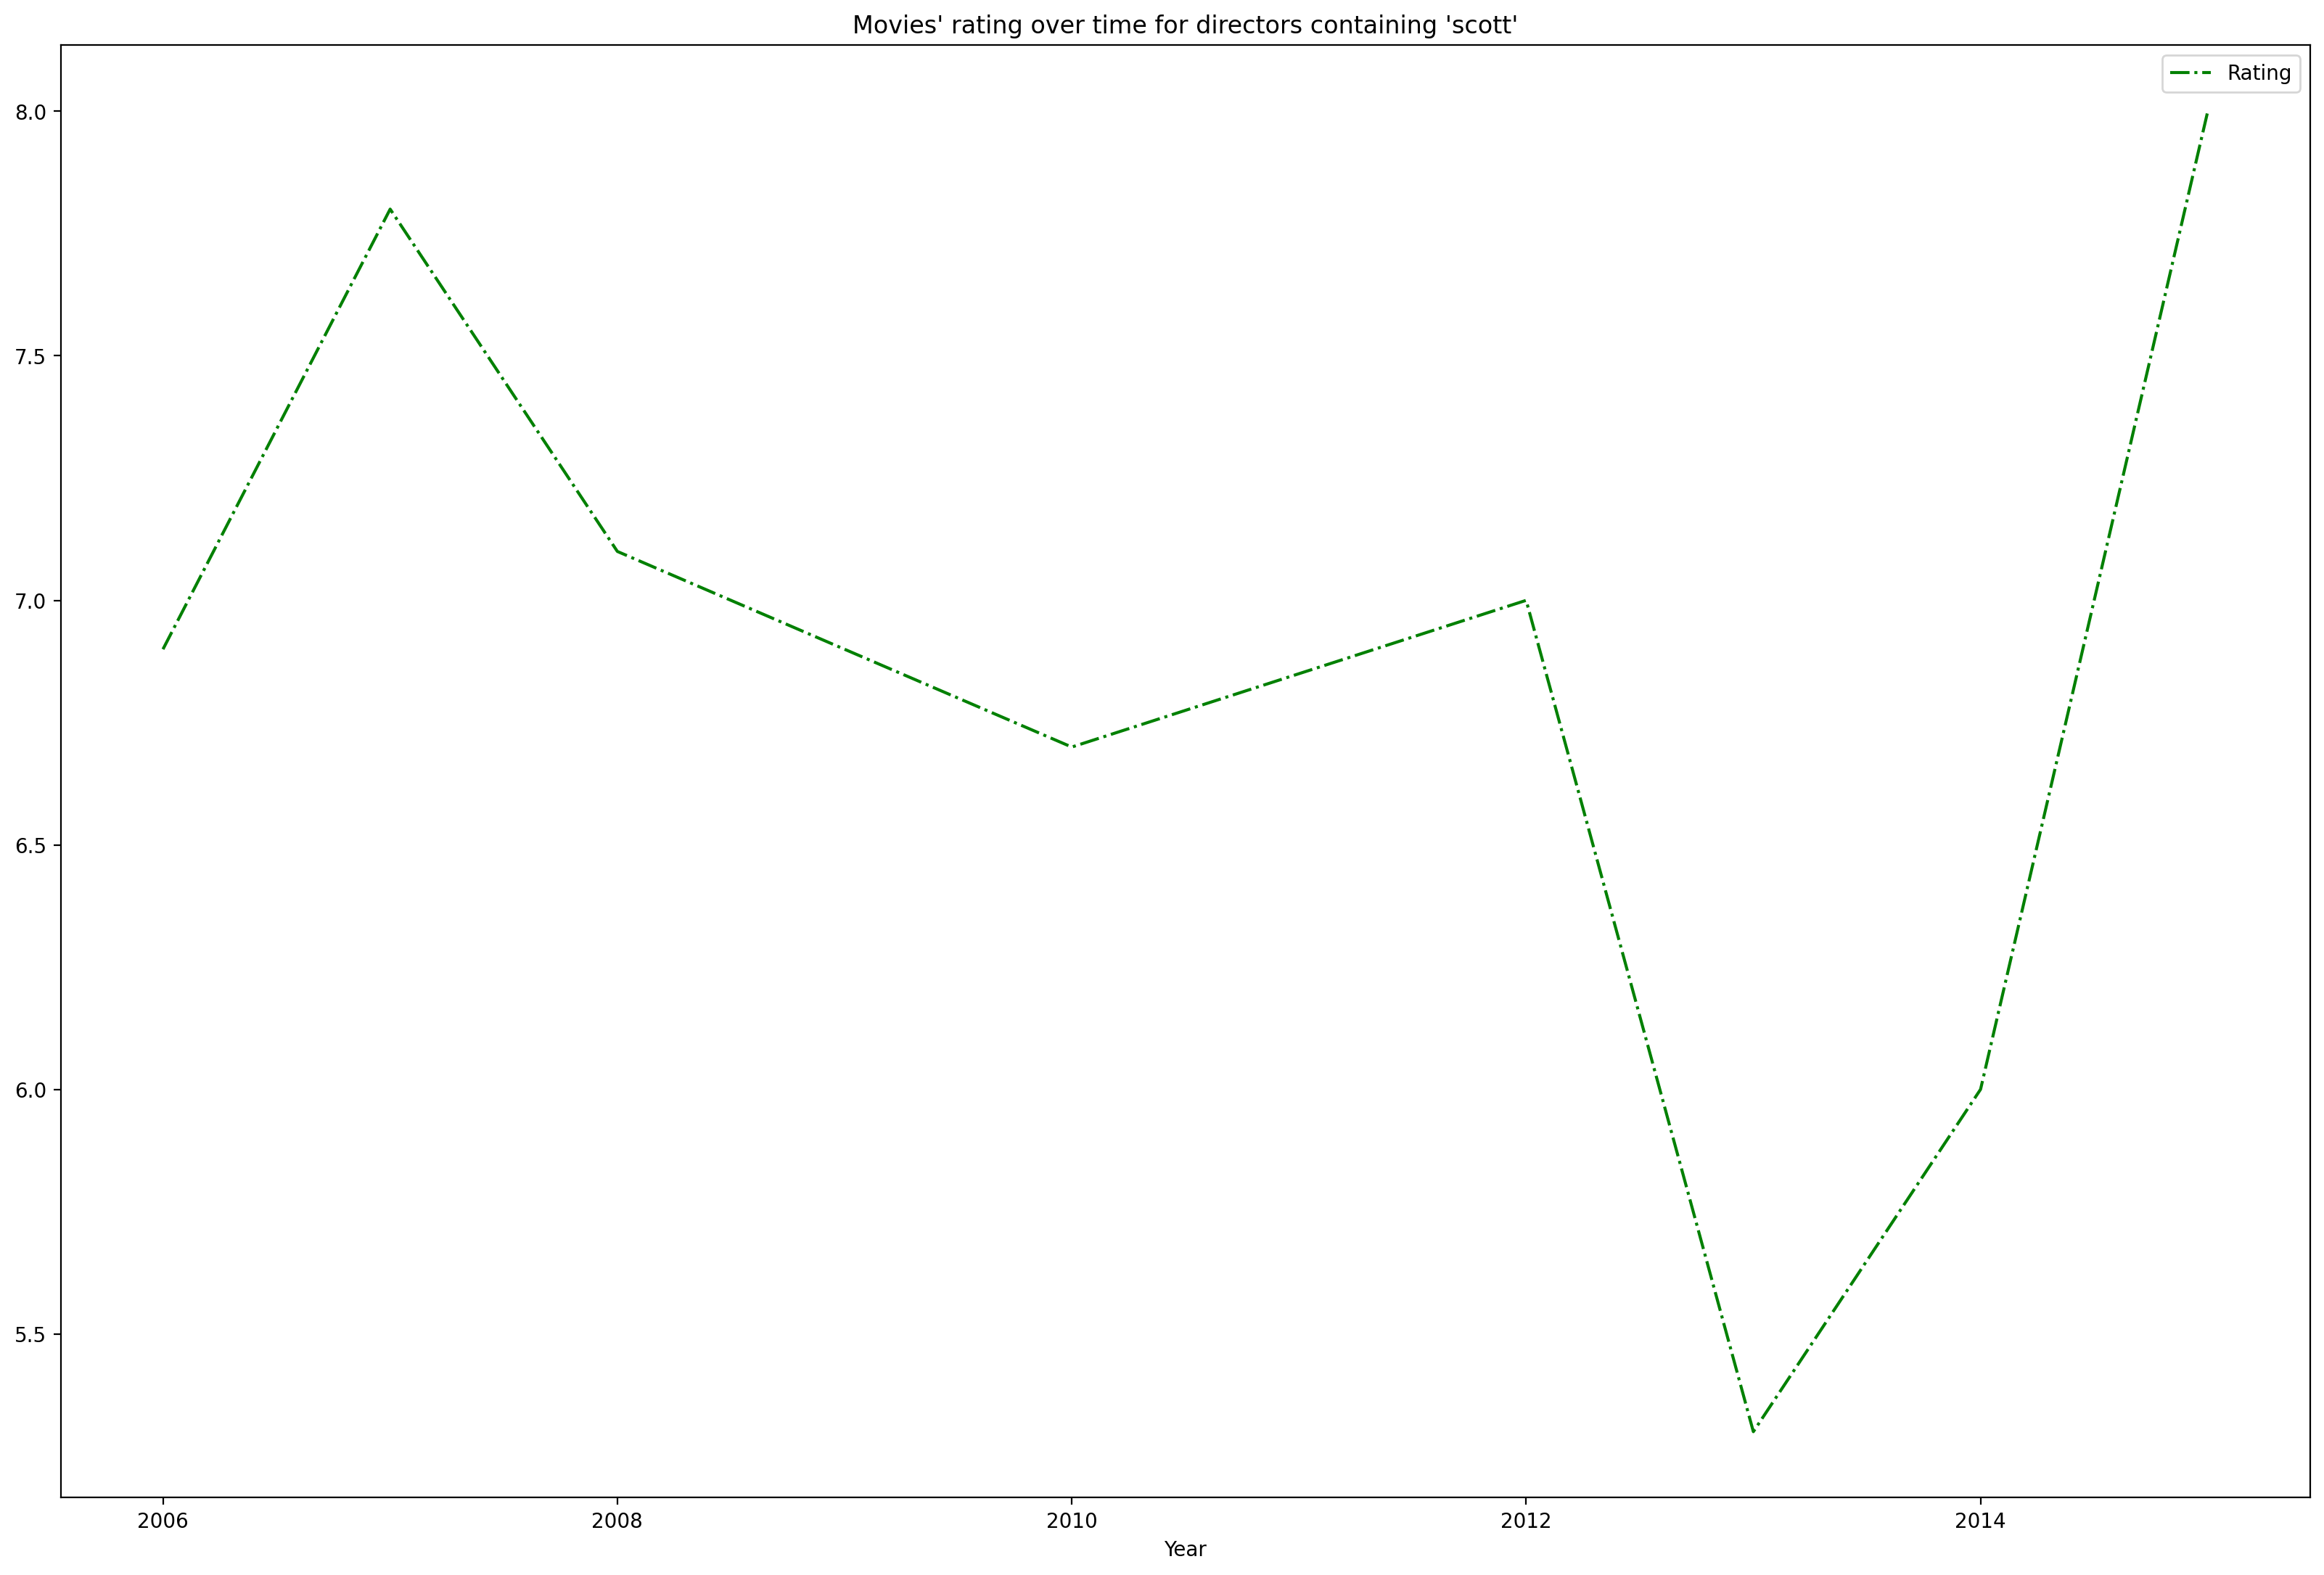

In [10]:
# Try to search for "ridley scott", but case-insensitive
# Specifying na to be False instead of NaN replaces the null findings with False. 
# We can then use the filtering series directly on our dataframe.
scott_movies = df[df['Director'].str.contains('ridley scott', case=False, na=False)]

# Sort the filtered DataFrame by year
scott_movies_sorted = scott_movies.sort_values(by="Year")

# Plot
scott_movies_sorted.plot(x="Year", y="Rating", linestyle="-.", title="Movies' rating over time for directors containing 'scott'", color='g', figsize=(20,13))

plt.show()


### Histograms

If we want to plot a simple Histogram based on a single column, we can call plot on the column series.

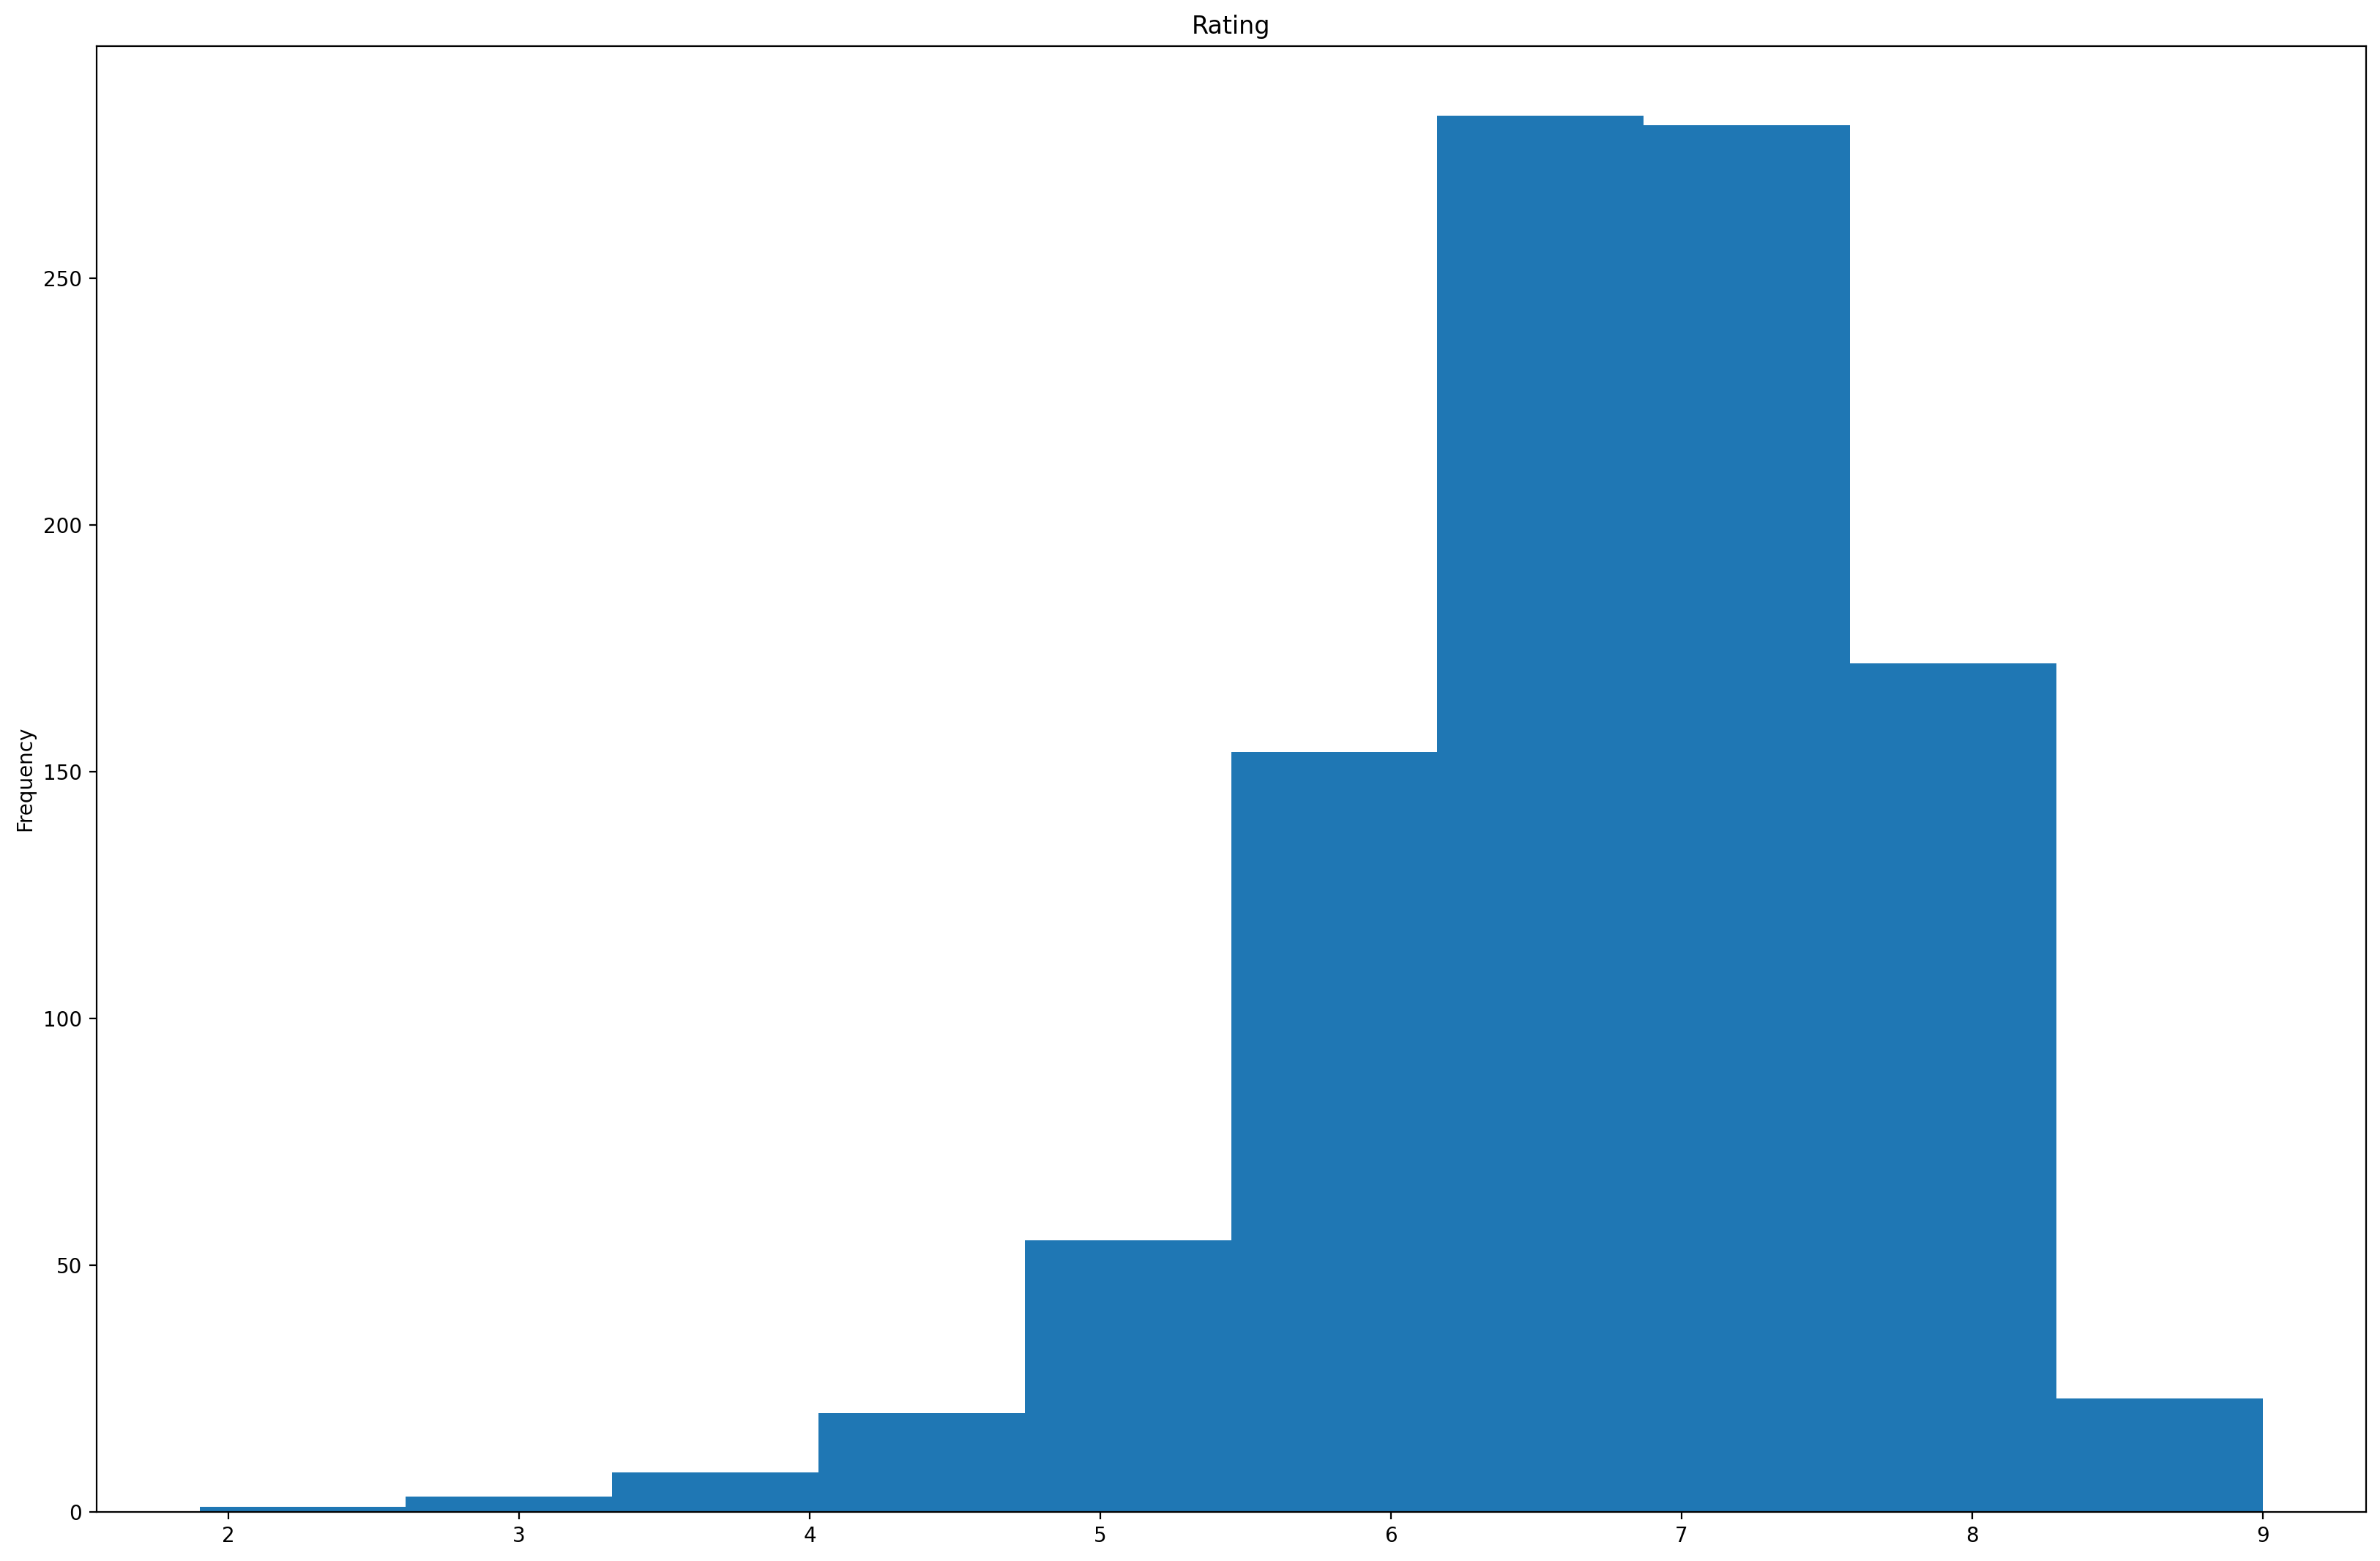

In [11]:
df['Rating'].plot(kind='hist', title='Rating', figsize=(20,13));

We can also make a graphical representation using the interquartile range, the famous __Boxplot__. Let's first recall what `describe` gives us on the ratings column.

In [13]:
df.Rating.describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

Using a Boxplot we can visualize this data.

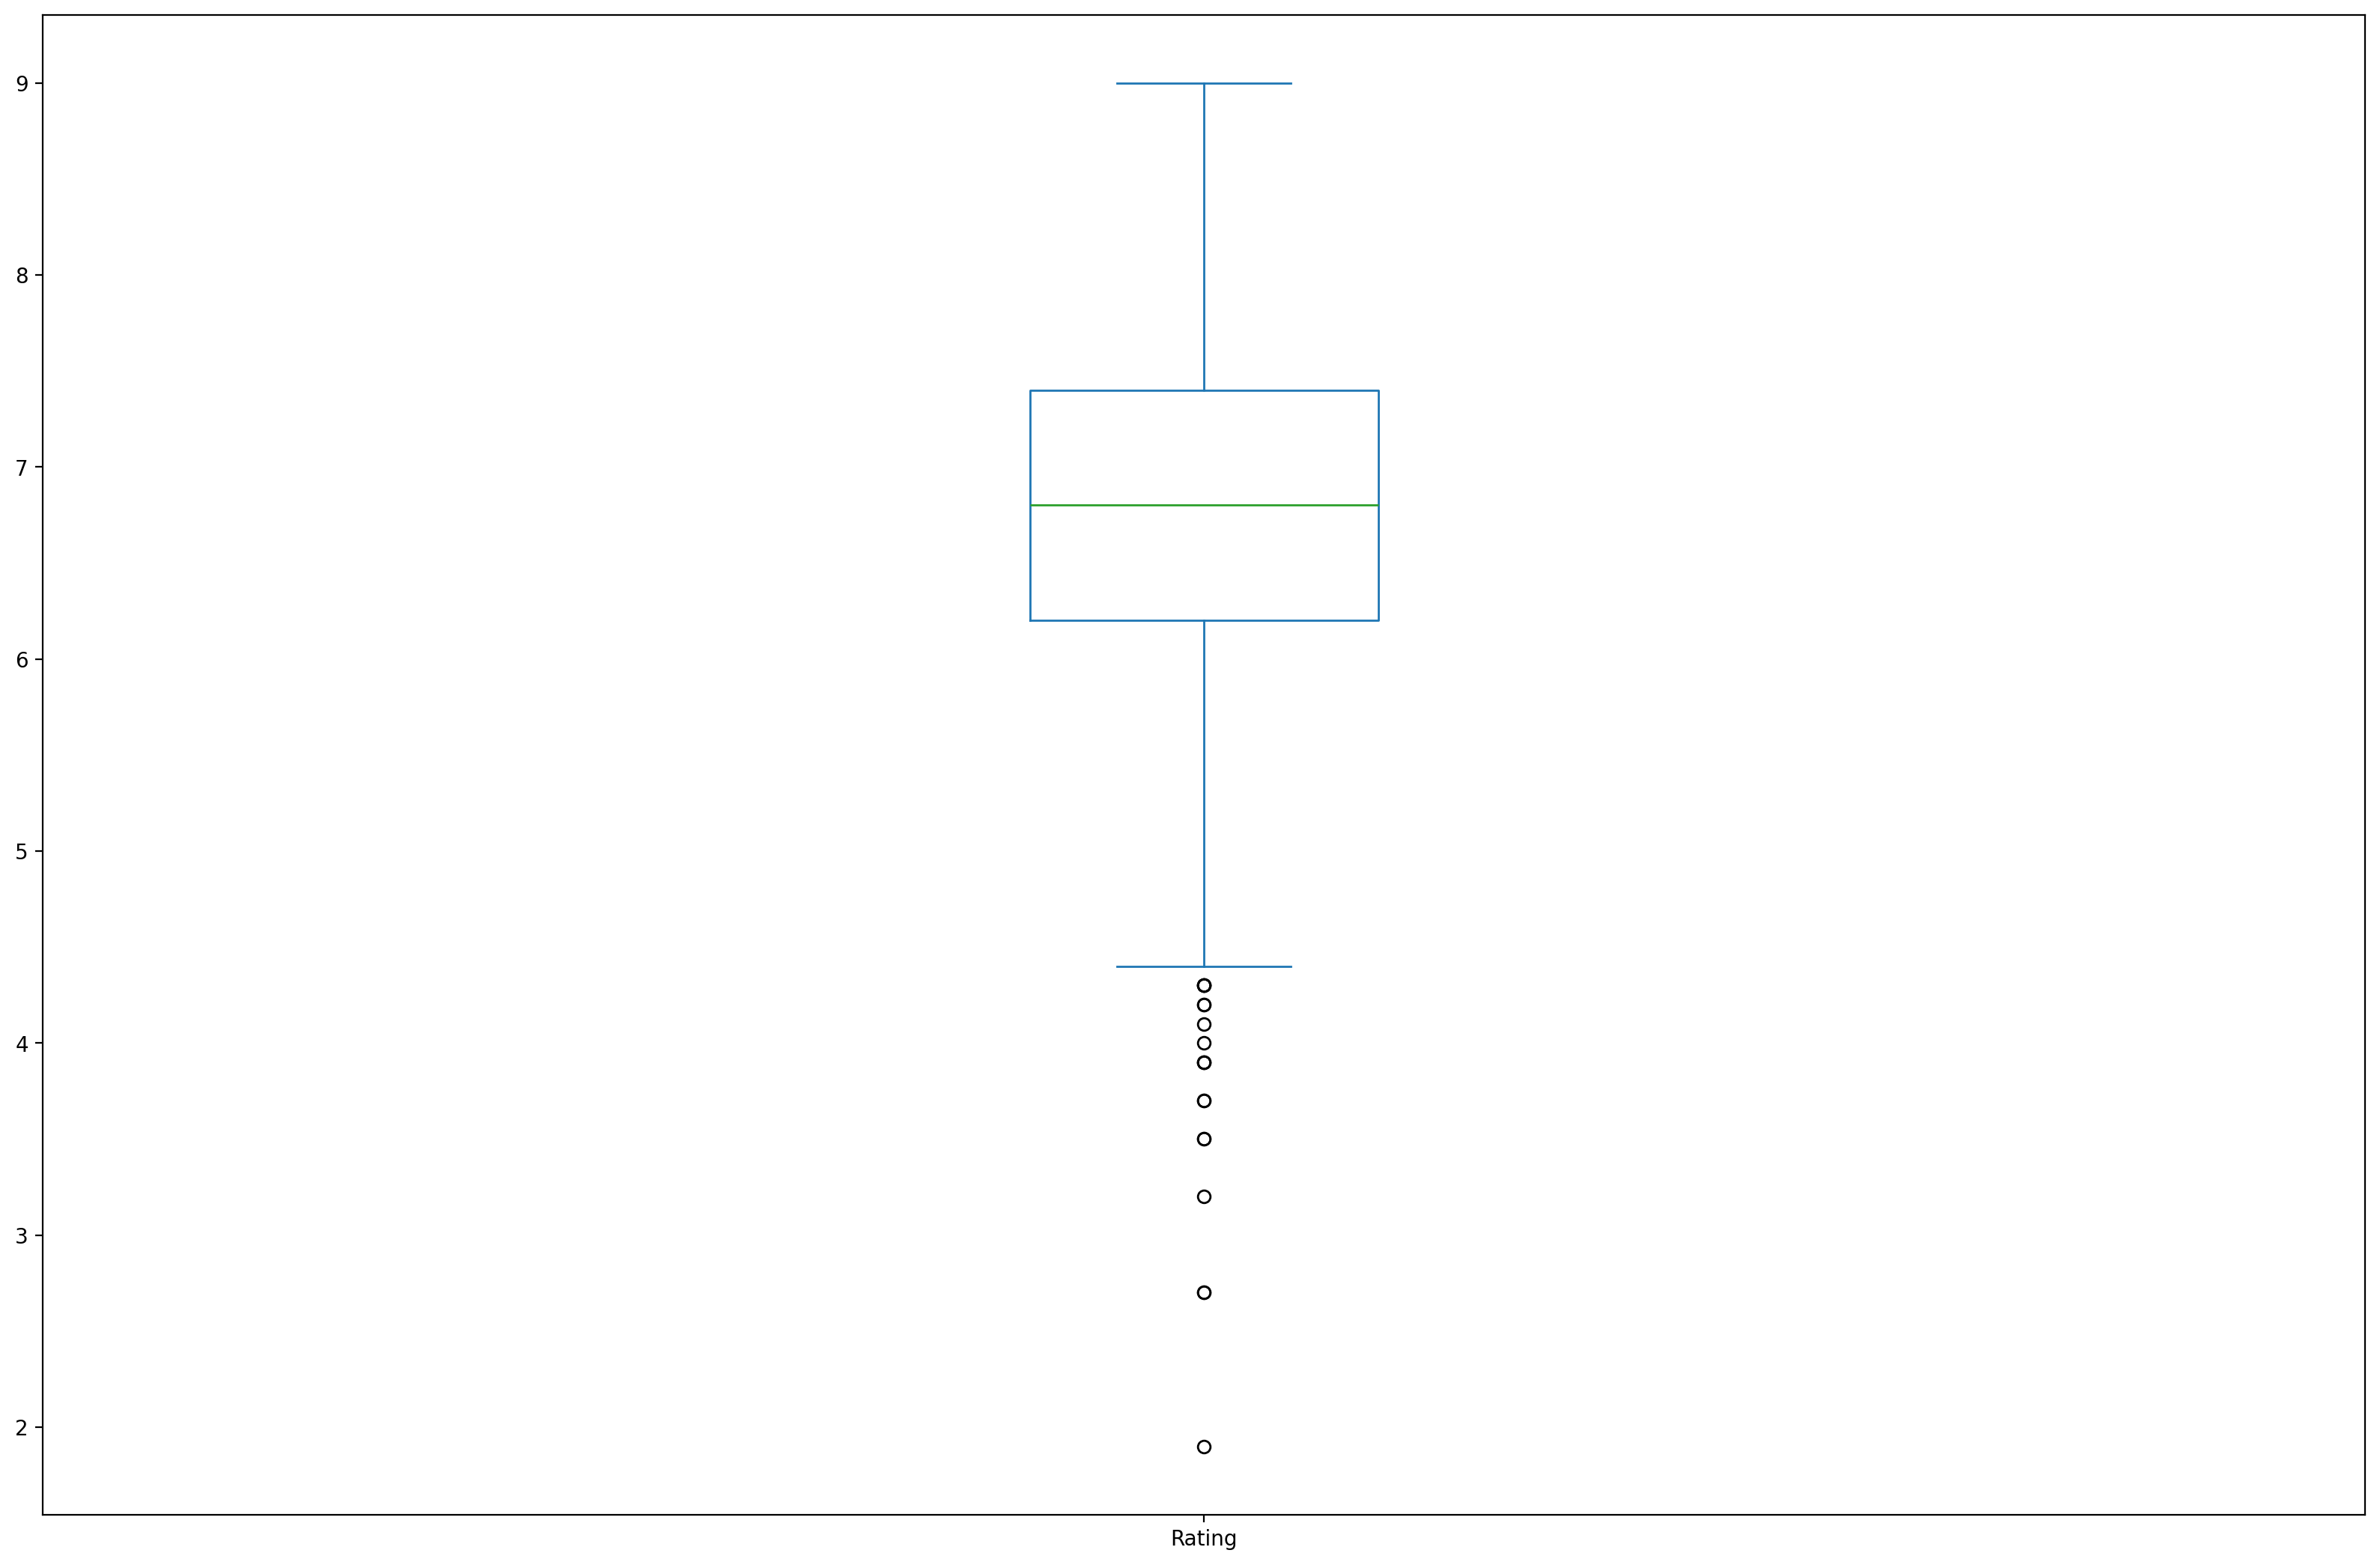

In [14]:
df['Rating'].plot(kind="box",
                figsize=(20,13));

To have a brief summary, one can have a look at the picture below.

<p align="center">
    <img width="600" src="https://mathpullzone-8231.kxcdn.com/wp-content/uploads/boxplot-with-outliers.jpg">
</p>

By combining categorical and continuous data, we can create a Boxplot of revenue that is grouped by a Rating Category.

In [28]:
# Create rating category column
df["rating_category"] = df.Rating.apply(lambda x: 'good' if x>= 8.0 else 'bad')
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,rating_category
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,bad
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,bad
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,bad


You can use the pandas boxplot or the seaborn one. They are equivalent.

The advantage of seaborn is that the `groupby` is hidden by the boxplot, and the code is slightly more compact.

<Axes: xlabel='rating_category', ylabel='Revenue (Millions)'>

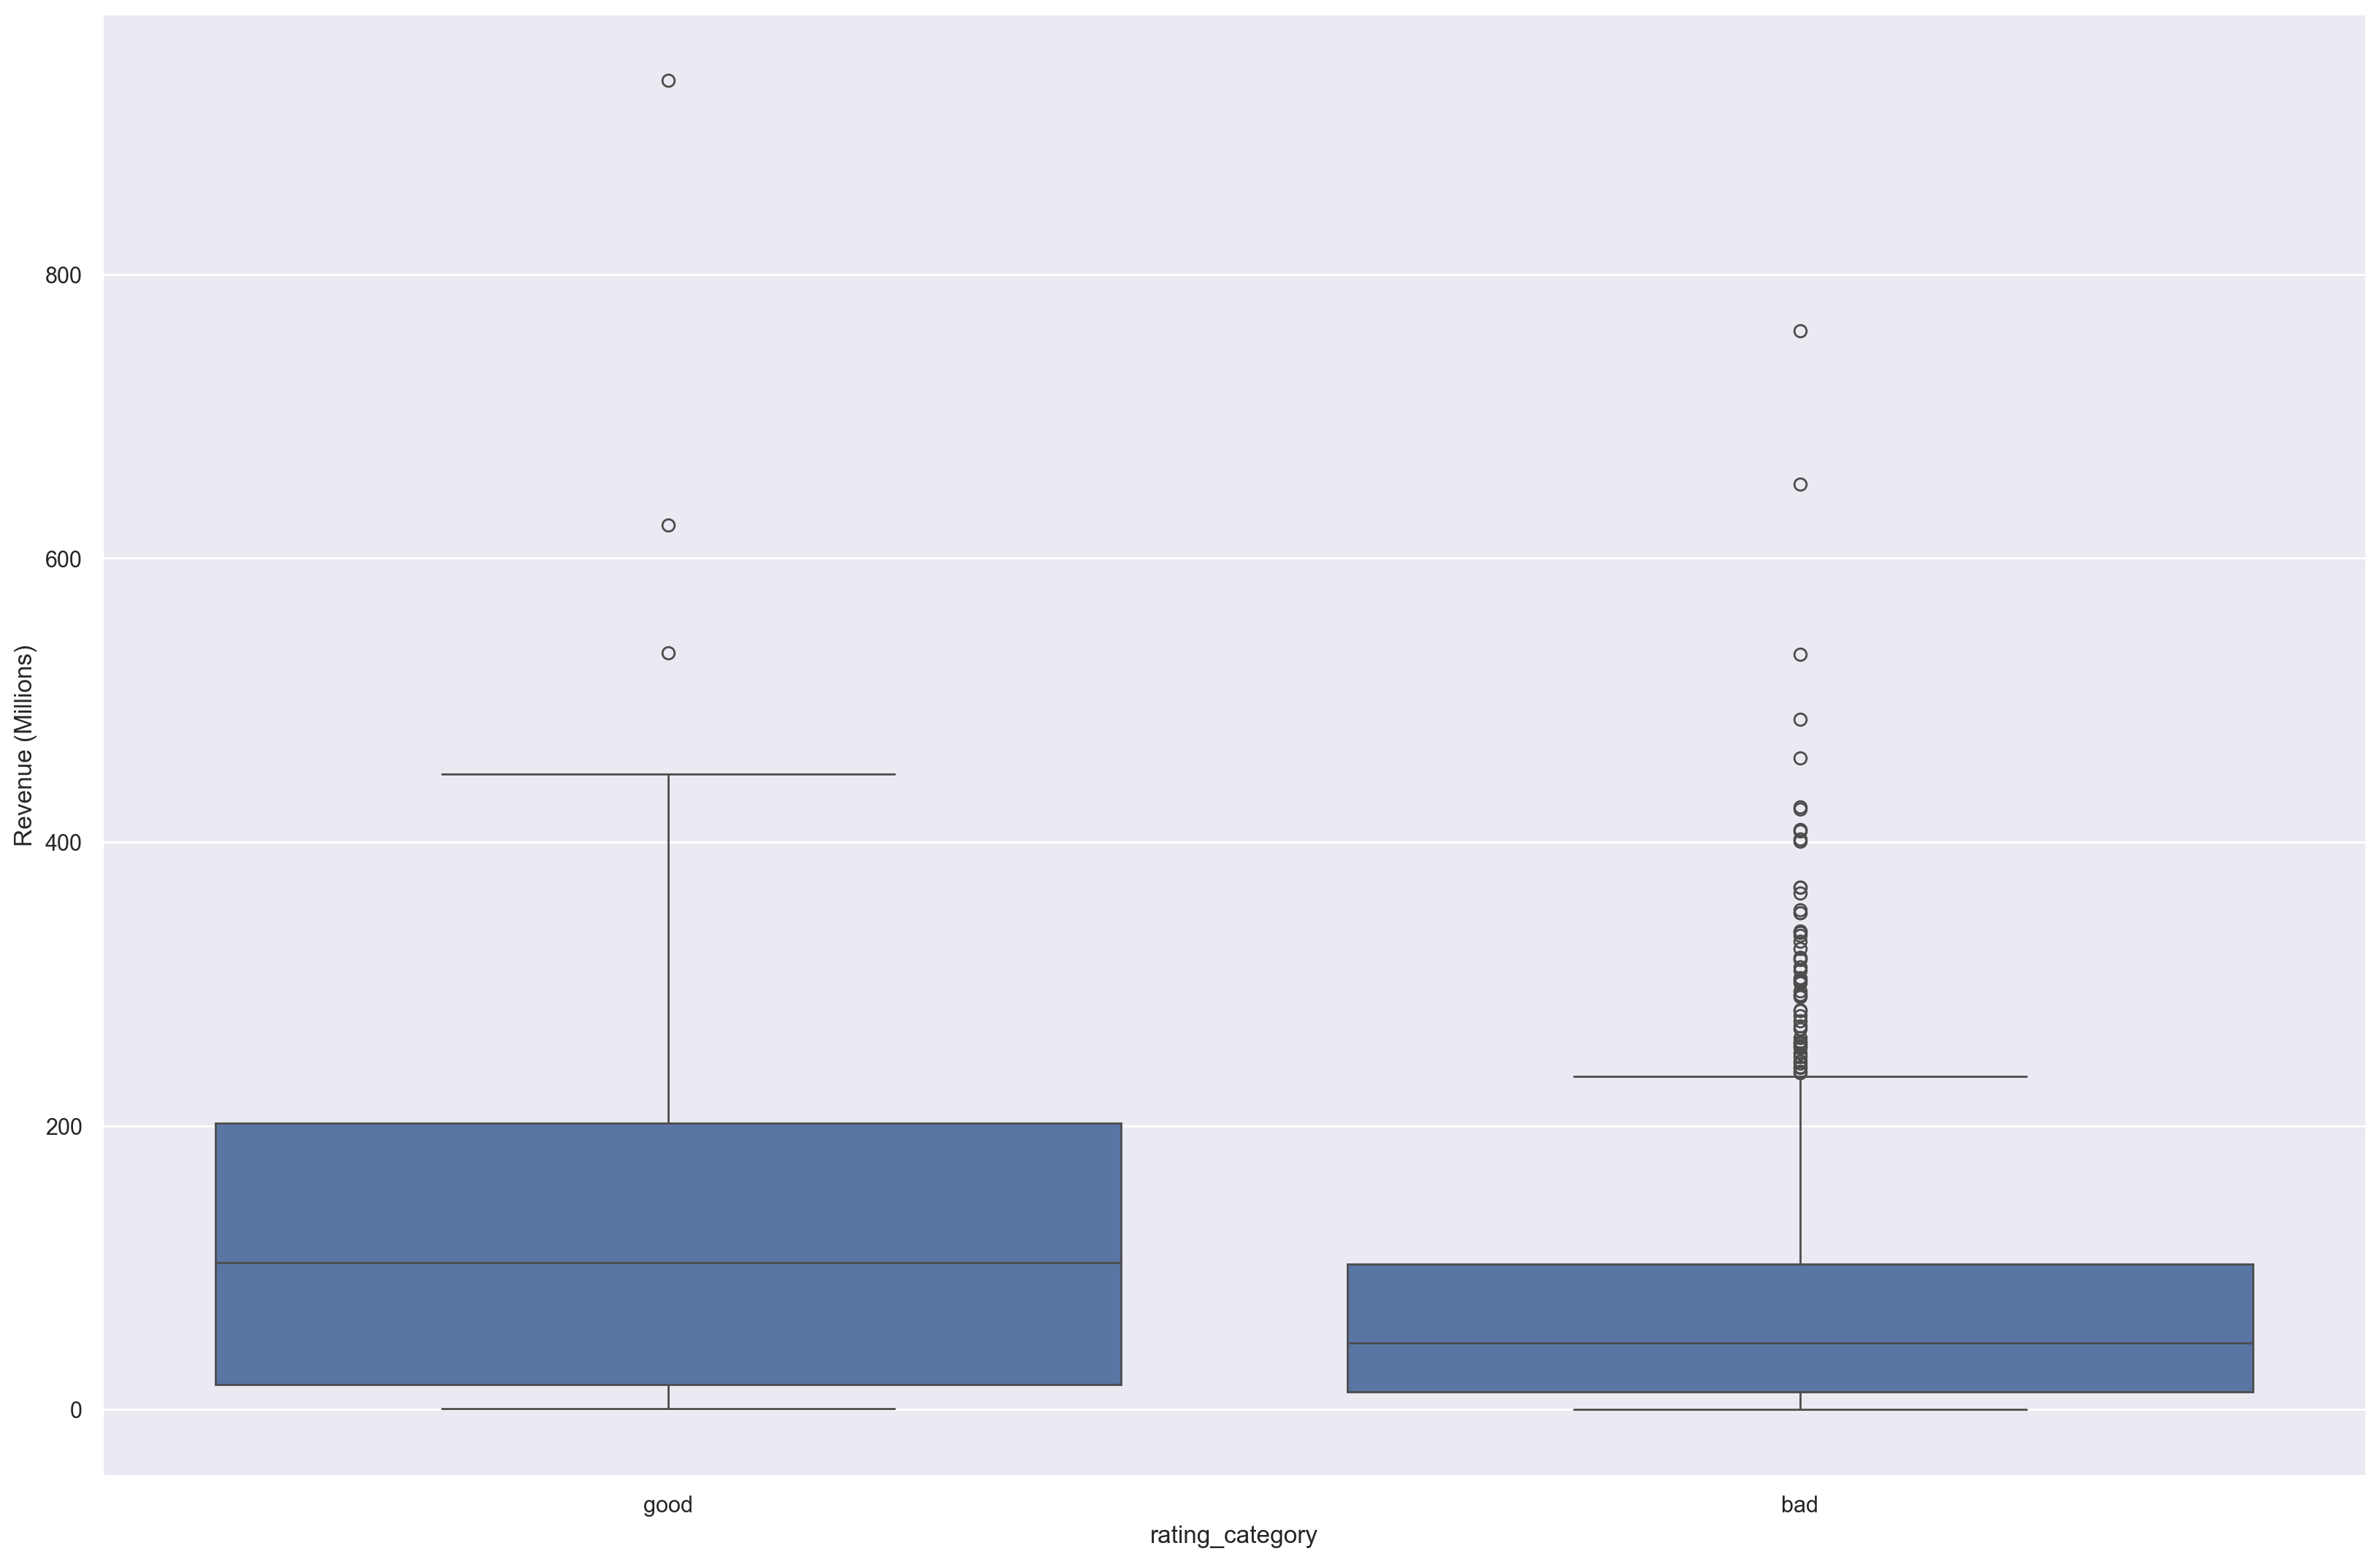

In [29]:
plt.figure(figsize=(20,13))
sns.boxplot(x=df["rating_category"],
            y=df['Revenue (Millions)'],
            data=df)

#### A final suggestion

Always label your axis!

<p align="center">
    <img width="689" src="https://raw.githubusercontent.com/qingkaikong/blog/master/2017_12_machine_learning_funny_pictures/figures/figure_20.png">
</p>

---

#### Exercises

1. Write a Pandas code to get those movies whose revenue more than $2$ million, sort them by rating, change good/bad threshold to `7.0` for `rating_category` and build an histogram for each rating category.

2. Produce a boxplot for visualising the rating grouped by release year.